![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/Spark_NLP_Udemy_MOOC/Open_Source/20.02.ClassifierDLModel.ipynb)

# **ClassifierDLModel**

This notebook will cover the different parameters and usages of `ClassifierDLModel`. 

<br/>

Text classification in Natural Language Processing (NLP) is the task of automatically assigning a set of predefined categories to unstructured text.  It is often used to classify documents, emails, or web pages into meaningful categories. It can also be used to classify short pieces of text such as tweets, reviews, or comments. Text classification can help to organize and structure text data, identify topics and topics of interest, and automate many aspects of text processing.

<br/>

`ClassifierDLModel` annotator provides the ability to make text classifications. 


**📖 Learning Objectives:**

1. Understand how `ClassifierDL` algorithm works.

2. Understand how `ClassifierDL` follows an unsupervised approach which builds upon features extracted from the text.

3. Become comfortable using the different parameters of the annotator.


**🔗 Helpful Links:**

- Documentation : [ClassifierDLModel](https://nlp.johnsnowlabs.com/docs/en/annotators#classifierdl)

- Python Docs : [ClassifierDLModel](https://nlp.johnsnowlabs.com/api/python/reference/autosummary/sparknlp/annotator/classifier_dl/classifier_dl/index.html#sparknlp.annotator.classifier_dl.classifier_dl.ClassifierDLModel)

- Scala Docs : [ClassifierDLModel](https://nlp.johnsnowlabs.com/api/com/johnsnowlabs/nlp/annotators/classifier/dl/ClassifierDLModel.html)

- For extended examples of usage, see the [Spark NLP Workshop repository](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/5.Text_Classification_with_ClassifierDL.ipynb).

- For additional information, see [Text Classification in Spark NLP with Bert and Universal Sentence Encoders](https://towardsdatascience.com/text-classification-in-spark-nlp-with-bert-and-universal-sentence-encoders-e644d618ca32).


ClassifierDl architecture is discussed in the [Mining Adverse Drug Reactions from Unstructured Mediums at Scale](https://arxiv.org/abs/2201.01405) research paper.

According to the researchers, to be able to process large volume of data, a text classification model needs to be scalable, and accurate, as it is used to filter out documents, reviews, and tweets that do not contain any indication of adverse event. To achieve this, John Snow Labs team used a Fully Connected Neural Network (FCNN) model that does not require hand-crafted features, and relies on a single embedding vector for classification.

  

## **📜 Background**


`ClassifierDL` is the very first multi-class text classifier in Spark NLP and it uses various text embeddings as an input for text classifications. The `ClassifierDL` annotator uses a deep learning model (DNNs) that is built inside TensorFlow and supports up to 100 classes.

While embedding a sentence, along with words, the context of the whole sentence needs to be captured in that vector. 

It is possible to train a text classifier model with Bert, Elmo, Glove and Universal Sentence Encoders in Spark NLP using the `ClassiferDLApproach` annotator.

`ClassifierDLModel`, on the other hand, uses pre-trained word and sentence embeddings to represent words and sentences as dense vectors, and then passes these vectors through a deep neural network to make a **prediction** about the class of a text document. It can be used for tasks such as sentiment analysis, topic classification, and intent detection.



## **🎬 Colab Setup**

In [ ]:
! pip install -q pyspark==3.1.2  spark-nlp==4.2.4

In [2]:
import sparknlp

import sys
sys.path.append('../../')

import sparknlp

from sparknlp.base import LightPipeline
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.sql.functions import array_contains
from sparknlp.annotator import *
from sparknlp.common import RegexRule
from sparknlp.base import DocumentAssembler, Finisher
import pandas as pd
import pyspark.sql.functions as F

spark = sparknlp.start()

print("Spark NLP version", sparknlp.version())
print("Apache Spark version:", spark.version)

spark

Spark NLP version 4.2.4
Apache Spark version: 3.1.2


## **🖨️ Input/Output Annotation Types**

- Input: `SENTENCE EMBEDDINGS`

- Output: `CATEGORY`

## **🔎 Parameters** for `ClassifierDLModel`

- `setConfigProtoBytes`: ([int]) is used for setting the Tensorflow config Protobytes passed to the TF session. TF backend is used by the `ClassifierDLModel` to perform deep learning computations for text classification tasks.

- `setDatasetParams`: allows the user to set the dataset parameters for training the model. The dataset parameters control how the training data is processed and used to train the model.

- `getClasses`: ([str]) is used for getting the labels used to train the model.

- `getConfigProtoBytes`: is used for getting the Tensorflow ConfigProtobytes passed to the TF session.

- `getEngine`: is used for getting the engine. 

## **Using a 💎 Model From the John Snow Labs Models Hub**

Instead of training, saving, loading and getting predictions from a model, it is possible to use a model from the John Snow Labs Models Hub.

This model's name is [Fake News Classifier](https://nlp.johnsnowlabs.com/2020/07/03/classifierdl_use_fakenews_en.html) and the model automatically determines whether a news article is Real or Fake. Model's homepage will give you detailed information about the model, its size, data source used for training, benchmarking (metrics about the performance) and a sample pipeline showing how to use it.

The model was trained using Universal Sentence Encoder embeddings, so same embeddings must be used in the pipeline.

The screenshot below shows the search results for a Classifier on the Models Hub page:
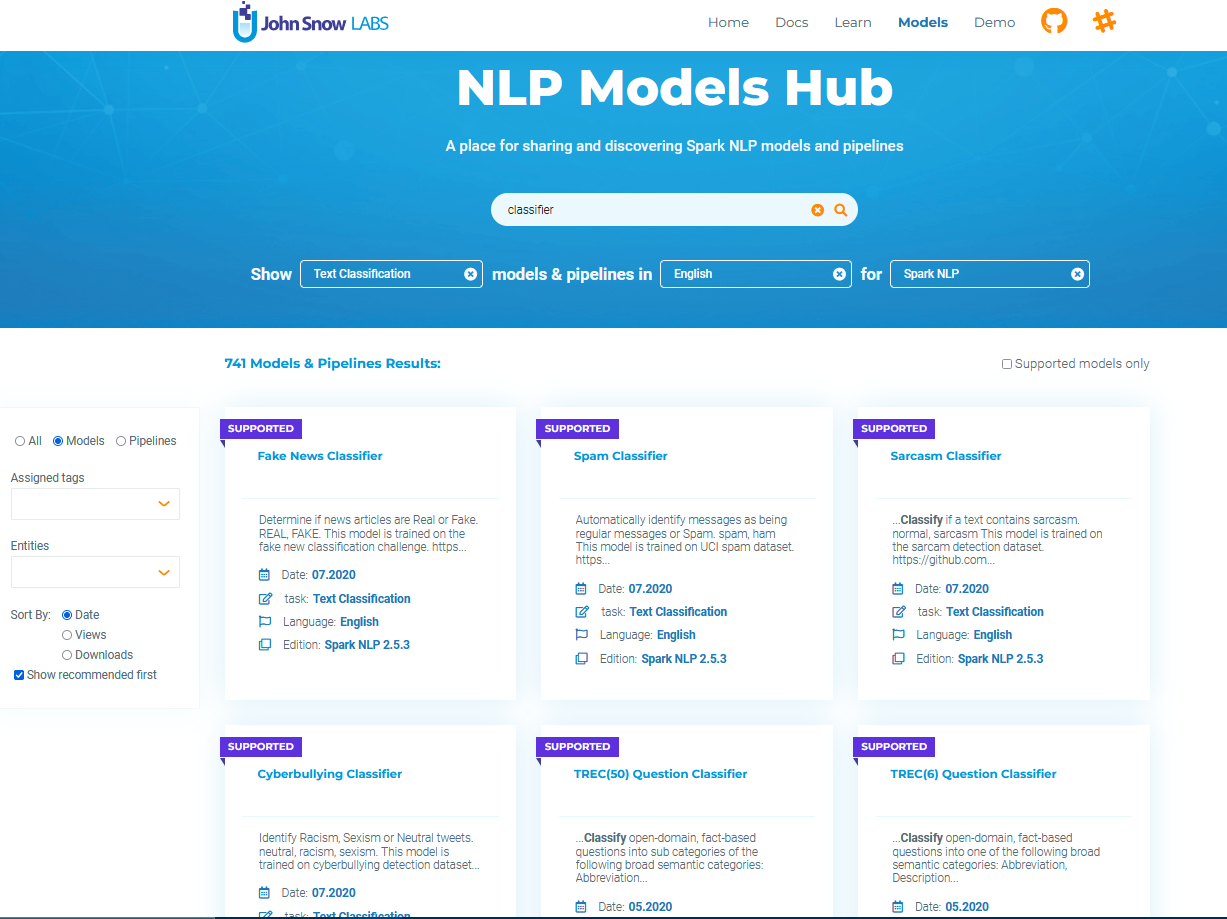

In [3]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

use = UniversalSentenceEncoder.pretrained(lang="en") \
    .setInputCols(["document"])\
    .setOutputCol("sentence_embeddings")

document_classifier = ClassifierDLModel.pretrained('classifierdl_use_fakenews', 'en') \
    .setInputCols(["sentence_embeddings"]) \
    .setOutputCol("class")

nlpPipeline = Pipeline(stages=[documentAssembler, use, document_classifier])


tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
classifierdl_use_fakenews download started this may take some time.
Approximate size to download 21.4 MB
[OK!]


<br/>

#### We can get the parameters of the `ClassifierDLModel` in detail by using **extractParamMap**. We will be able to see:

*   Definition of the parameter,
*   Default value,
*   Instantaneous value (if a new value was set). 






In [19]:
document_classifier.extractParamMap()

{Param(parent='ClassifierDLModel_067520557d6d', name='engine', doc='Deep Learning engine used for this model'): 'tensorflow',
 Param(parent='ClassifierDLModel_067520557d6d', name='lazyAnnotator', doc='Whether this AnnotatorModel acts as lazy in RecursivePipelines'): False,
 Param(parent='ClassifierDLModel_067520557d6d', name='classes', doc='get the tags used to trained this ClassifierDLModel'): ['FAKE',
  'REAL'],
 Param(parent='ClassifierDLModel_067520557d6d', name='inputCols', doc='previous annotations columns, if renamed'): ['sentence_embeddings'],
 Param(parent='ClassifierDLModel_067520557d6d', name='outputCol', doc='output annotation column. can be left default.'): 'class',
 Param(parent='ClassifierDLModel_067520557d6d', name='storageRef', doc='unique reference name for identification'): 'tfhub_use'}

<br/>

#### We can also use parameter **getters** to see the values of certain parameters:

In [20]:
document_classifier.getEngine()

'tensorflow'

In [21]:
document_classifier.getClasses()

['FAKE', 'REAL']

In [22]:
document_classifier.getStorageRef()

'tfhub_use'

### **🔦 Light Pipeline Results**

[LightPipeline](https://nlp.johnsnowlabs.com/docs/en/concepts#using-spark-nlps-lightpipeline) is a Spark NLP specific Pipeline class equivalent to the Spark ML Pipeline. The difference is that it’s execution does not hold to Spark principles, instead it computes everything locally (but in parallel) in order to achieve **fast results** when dealing with **small amounts of data**.

In [23]:
empty_df = spark.createDataFrame([['']]).toDF("text")

In [24]:
text_list=[
"""Donald Trump a KGB Spy? 11/02/2016 In today’s video, Christopher Greene of AMTV reports Hillary Clinton campaign accusation that Donald Trump is a KGB spy is about as weak and baseless a claim as a Salem witch hunt or McCarthy era trial. It’s only because Hillary Clinton is losing that she is lobbing conspiracy theory. Citizen Quasar The way I see it, one of two things will happen: 1. Trump will win by a landslide but the election will be stolen via electronic voting, just like I have been predicting for over a decade, and the American People will accept the skewed election results just like they accept the TSA into their crotches. 2. Somebody will bust a cap in Hillary’s @$$ killing her and the election will be postponed. Follow AMTV!""",
"""President Barack Obama said former Secretary of State Hillary Clinton’s use of a personal email server was a mistake, but that U.S. national security hadn’t been endangered. In his first extensive remarks on the controversy that has roiled the Democratic presidential primary, Mr. Obama said on CBS’s “60 Minutes” program that questions about Mrs. Clinton’s email arrangement were legitimate. “It is important for her to answer these questions to the satisfaction of the American public,” Mr. Obama said.""",
"""Abby Martin Exposes What Hillary Clinton Really Represents ‹ › Since 2011, VNN has operated as part of the Veterans Today Network ; a group that operates over 50 plus media, information and service online sites for U.S. Military Veterans. Morning Joe Destroys Corrupt Clinton Foundation (Laughable) “Total Corruption” By VNN on October 28, 2016 'Pay for Play' and 'Quid Pro Quo' 'Shut Down The Foundation' Inside the Clinton’s Foundation and Personal Gains They are bragging that they can shake down foundation clients, for Bill Clinton money… This is sleazy… Joe Scarborough. Follow the money.""",
"""President Barack Obama is ramping up efforts to convince individual House members to grant him fast-track authority to negotiate trade deals, focusing his efforts on a dwindling group of undecided Democratic lawmakers.But Democrats who have already backed the deal publicly said these members need to be convinced they are not trading away their own political futures for a vote on fast-track. Potentially decisive are moderate, pro-growth members of the New Democrat Coalition. Its vice-chair, Rep. Jim Himes (D., Conn.), spoke as recently as Monday to the president, after fielding calls from the White House during last week’s recess as well.""",
"""Most American spend over 9 hours a day using media. Is this making us dumber?? Are you living in a media induced trace? Do you know the truth of the world or do you know what the manipulators want you to know?! Professor Jerry Kroth (Ph. D. Psychology) examines the ties between advertising and factual knowledge. Most people can name every mascot of most companies, but they can not name hardly any historical figures. How did we get here? These are questions that Professor Kroth explains in this well thought out presentation. This talk is based on Dr. Kroth's recent book, "Duped! Delusion, Denial, and the end of the American dream." """,
"""Michael Brown’s parents plan to bring a civil lawsuit for the wrongful death of their son against Darren Wilson and the city of Ferguson, Missouri. The announcment came a day after the Justice Department released its report on the abuses of the city’s police department and said Wilson wouldn’t be charged for violating Brown’s civil rights. Brown family lawyers note that the burden of proof is lower in a civil case than the criminal cases that were considered by both the federal government and a St. Louis County grand jury.""",
"""It’s Going to Change RADICALLY With Silver – HUGE Demand Coming | Cliff High Data mining expert Cliff High says the economy is much worse than most people think, and that bubble is going to pop after Election Day. Inflation is also coming, and that will be very positive for precious metals . High contends, “ Gold and silver are going to rise relative to the falling currencies. Gold and silver in actual purchasing power will also rise. They won’t be saying an ounce of gold bought a good suit 100 years ago and an ounce of gold will buy a good suit now. That’s going to change, and it’s also going to change radically with silver . Also, in our data sets between 2019 and 2024 , silver becomes the metal to have… You need to have silver . 2017 Gold Pandas and 2017 Silver Pandas Are Now Available! Secure Your 2017 Panda Coins Today at SD Bullion!""",
"""Senate Majority Leader Mitch McConnell announced a "Plan B" to halt a nuclear deal that would lift sanctions against Iran.The measure, which Republican aides said likely would be voted on Thursday, would prevent President Obama from lifting the sanctions until Iran releases four jailed Americans and recognizes the right of Israel to exist.McConnell made the announcement as Democrats prepared for a second time to filibuster a resolution of disapproval of the nuclear deal. Soon after McConnell's remarks, 42 Democrats again filibustered the resolution, preventing it from getting the 60 votes needed to advance."My strong preference is for Democrats to simply allow an up-or-down vote on the president's Iran deal." McConnell said. "But if they're determined to make that impossible, then at the very least we should be able to provide some protection to Israel and long-overdue relief to Americans who've languished in Iranian custody for years. Either way, this debate will continue." """,
"""TRUMP TSUNAMI INCOMING: What Trump Did In Florida Today Will Make Him President! TRUMP TSUNAMI INCOMING: What Trump Did In Florida Today Will Make Him President! fisher 5 mins ago News Comments Off on TRUMP TSUNAMI INCOMING: What Trump Did In Florida Today Will Make Him President! TRUMP TSUNAMI INCOMING: What Trump Did In Florida Today Will Make Him President! Breaking! Breaking! Bad news for Hillary in Florida. Early voting numbers from Florida are showing that Republicans have cast 17,000 more votes than Democrats. *** 6 days before the Election in 2012, Democrats in Florida cast 39,000 more votes than Republicans. *** Today, six days before the election, Republicans have now cast 17,000 more votes than Democrats. Watch Trump in Miami, FL today: """,
"""Sen. Marco Rubio (R-Fla.) is adding a veteran New Hampshire political operative to his team as he continues mulling a possible 2016 presidential bid, the latest sign that he is seriously preparing to launch a campaign later this year.Jim Merrill, who worked for former GOP presidential nominee Mitt Romney and ran his 2008 and 2012 New Hampshire primary campaigns, joined Rubio’s fledgling campaign on Monday, aides to the senator said.Merrill will be joining Rubio’s Reclaim America PAC to focus on Rubio’s New Hampshire and broader Northeast political operations."Marco has always been well received in New Hampshire, and should he run for president, he would be very competitive there," Terry Sullivan, who runs Reclaim America, said in a statement. "Jim certainly knows how to win in New Hampshire and in the Northeast, and will be a great addition to our team at Reclaim America.”News of Merrill’s hire was first reported by The New York Times.""",
]

In [25]:
lightpipelineModel = nlpPipeline.fit(empty_df)
light_model = LightPipeline(lightpipelineModel)

In [26]:
light_result = light_model.fullAnnotate(text_list)

In [27]:
light_result[0]

{'document': [Annotation(document, 0, 744, Donald Trump a KGB Spy? 11/02/2016 In today’s video, Christopher Greene of AMTV reports Hillary Clinton campaign accusation that Donald Trump is a KGB spy is about as weak and baseless a claim as a Salem witch hunt or McCarthy era trial. It’s only because Hillary Clinton is losing that she is lobbing conspiracy theory. Citizen Quasar The way I see it, one of two things will happen: 1. Trump will win by a landslide but the election will be stolen via electronic voting, just like I have been predicting for over a decade, and the American People will accept the skewed election results just like they accept the TSA into their crotches. 2. Somebody will bust a cap in Hillary’s @$$ killing her and the election will be postponed. Follow AMTV!, {})],
 'sentence_embeddings': [Annotation(sentence_embeddings, 0, 744, Donald Trump a KGB Spy? 11/02/2016 In today’s video, Christopher Greene of AMTV reports Hillary Clinton campaign accusation that Donald Tru

In [28]:
pd.set_option('max_colwidth', None)

result = []

for i in range(len(text_list)):
  
  r = light_result[i]['class'][0]
  pd.DataFrame({'class': [[r.result, r.metadata]]})
  
  for r in light_result[i]['class']:
    
    result.append(r.result)
        

df_clinical = pd.DataFrame({'News Type':result}, text_list)
df_clinical.reset_index(inplace=True)
df_clinical.rename(columns={'index':'text'}, inplace=True)

df_clinical["text"] = df_clinical["text"].str[:120]

df_clinical.head(10)

,text,News Type
0,"Donald Trump a KGB Spy? 11/02/2016 In today’s video, Christopher Greene of AMTV reports Hillary Clinton campaign accusat",FAKE
1,"President Barack Obama said former Secretary of State Hillary Clinton’s use of a personal email server was a mistake, bu",REAL
2,"Abby Martin Exposes What Hillary Clinton Really Represents ‹ › Since 2011, VNN has operated as part of the Veterans Toda",FAKE
3,President Barack Obama is ramping up efforts to convince individual House members to grant him fast-track authority to n,REAL
4,Most American spend over 9 hours a day using media. Is this making us dumber?? Are you living in a media induced trace?,FAKE
5,Michael Brown’s parents plan to bring a civil lawsuit for the wrongful death of their son against Darren Wilson and the,REAL
6,It’s Going to Change RADICALLY With Silver – HUGE Demand Coming | Cliff High Data mining expert Cliff High says the econ,FAKE
7,"Senate Majority Leader Mitch McConnell announced a ""Plan B"" to halt a nuclear deal that would lift sanctions against Ira",REAL
8,TRUMP TSUNAMI INCOMING: What Trump Did In Florida Today Will Make Him President! TRUMP TSUNAMI INCOMING: What Trump Did,FAKE
9,Sen. Marco Rubio (R-Fla.) is adding a veteran New Hampshire political operative to his team as he continues mulling a po,REAL


### **♻️ Transform**

In Spark NLP, the basic procedure for putting all the steps in the pipeline together and retrieving the results, a Pipeline is used. 

**fit()** will fit the model to the input training instances while **transform()** will perform predictions on the testing instances, based on the learned parameters during fit. 



In [29]:
pipelineModel = nlpPipeline.fit(empty_df)

In [30]:
text_list=[
"""Donald Trump a KGB Spy? 11/02/2016 In today’s video, Christopher Greene of AMTV reports Hillary Clinton campaign accusation that Donald Trump is a KGB spy is about as weak and baseless a claim as a Salem witch hunt or McCarthy era trial. It’s only because Hillary Clinton is losing that she is lobbing conspiracy theory. Citizen Quasar The way I see it, one of two things will happen: 1. Trump will win by a landslide but the election will be stolen via electronic voting, just like I have been predicting for over a decade, and the American People will accept the skewed election results just like they accept the TSA into their crotches. 2. Somebody will bust a cap in Hillary’s @$$ killing her and the election will be postponed. Follow AMTV!""",
"""President Barack Obama said former Secretary of State Hillary Clinton’s use of a personal email server was a mistake, but that U.S. national security hadn’t been endangered. In his first extensive remarks on the controversy that has roiled the Democratic presidential primary, Mr. Obama said on CBS’s “60 Minutes” program that questions about Mrs. Clinton’s email arrangement were legitimate. “It is important for her to answer these questions to the satisfaction of the American public,” Mr. Obama said.""",
"""Abby Martin Exposes What Hillary Clinton Really Represents ‹ › Since 2011, VNN has operated as part of the Veterans Today Network ; a group that operates over 50 plus media, information and service online sites for U.S. Military Veterans. Morning Joe Destroys Corrupt Clinton Foundation (Laughable) “Total Corruption” By VNN on October 28, 2016 'Pay for Play' and 'Quid Pro Quo' 'Shut Down The Foundation' Inside the Clinton’s Foundation and Personal Gains They are bragging that they can shake down foundation clients, for Bill Clinton money… This is sleazy… Joe Scarborough. Follow the money.""",
"""President Barack Obama is ramping up efforts to convince individual House members to grant him fast-track authority to negotiate trade deals, focusing his efforts on a dwindling group of undecided Democratic lawmakers.But Democrats who have already backed the deal publicly said these members need to be convinced they are not trading away their own political futures for a vote on fast-track. Potentially decisive are moderate, pro-growth members of the New Democrat Coalition. Its vice-chair, Rep. Jim Himes (D., Conn.), spoke as recently as Monday to the president, after fielding calls from the White House during last week’s recess as well.""",
"""Most American spend over 9 hours a day using media. Is this making us dumber?? Are you living in a media induced trace? Do you know the truth of the world or do you know what the manipulators want you to know?! Professor Jerry Kroth (Ph. D. Psychology) examines the ties between advertising and factual knowledge. Most people can name every mascot of most companies, but they can not name hardly any historical figures. How did we get here? These are questions that Professor Kroth explains in this well thought out presentation. This talk is based on Dr. Kroth's recent book, "Duped! Delusion, Denial, and the end of the American dream." """,
"""Michael Brown’s parents plan to bring a civil lawsuit for the wrongful death of their son against Darren Wilson and the city of Ferguson, Missouri. The announcment came a day after the Justice Department released its report on the abuses of the city’s police department and said Wilson wouldn’t be charged for violating Brown’s civil rights. Brown family lawyers note that the burden of proof is lower in a civil case than the criminal cases that were considered by both the federal government and a St. Louis County grand jury.""",
"""It’s Going to Change RADICALLY With Silver – HUGE Demand Coming | Cliff High Data mining expert Cliff High says the economy is much worse than most people think, and that bubble is going to pop after Election Day. Inflation is also coming, and that will be very positive for precious metals . High contends, “ Gold and silver are going to rise relative to the falling currencies. Gold and silver in actual purchasing power will also rise. They won’t be saying an ounce of gold bought a good suit 100 years ago and an ounce of gold will buy a good suit now. That’s going to change, and it’s also going to change radically with silver . Also, in our data sets between 2019 and 2024 , silver becomes the metal to have… You need to have silver . 2017 Gold Pandas and 2017 Silver Pandas Are Now Available! Secure Your 2017 Panda Coins Today at SD Bullion!""",
"""Senate Majority Leader Mitch McConnell announced a "Plan B" to halt a nuclear deal that would lift sanctions against Iran.The measure, which Republican aides said likely would be voted on Thursday, would prevent President Obama from lifting the sanctions until Iran releases four jailed Americans and recognizes the right of Israel to exist.McConnell made the announcement as Democrats prepared for a second time to filibuster a resolution of disapproval of the nuclear deal. Soon after McConnell's remarks, 42 Democrats again filibustered the resolution, preventing it from getting the 60 votes needed to advance."My strong preference is for Democrats to simply allow an up-or-down vote on the president's Iran deal." McConnell said. "But if they're determined to make that impossible, then at the very least we should be able to provide some protection to Israel and long-overdue relief to Americans who've languished in Iranian custody for years. Either way, this debate will continue." """,
"""TRUMP TSUNAMI INCOMING: What Trump Did In Florida Today Will Make Him President! TRUMP TSUNAMI INCOMING: What Trump Did In Florida Today Will Make Him President! fisher 5 mins ago News Comments Off on TRUMP TSUNAMI INCOMING: What Trump Did In Florida Today Will Make Him President! TRUMP TSUNAMI INCOMING: What Trump Did In Florida Today Will Make Him President! Breaking! Breaking! Bad news for Hillary in Florida. Early voting numbers from Florida are showing that Republicans have cast 17,000 more votes than Democrats. *** 6 days before the Election in 2012, Democrats in Florida cast 39,000 more votes than Republicans. *** Today, six days before the election, Republicans have now cast 17,000 more votes than Democrats. Watch Trump in Miami, FL today: """,
"""Sen. Marco Rubio (R-Fla.) is adding a veteran New Hampshire political operative to his team as he continues mulling a possible 2016 presidential bid, the latest sign that he is seriously preparing to launch a campaign later this year.Jim Merrill, who worked for former GOP presidential nominee Mitt Romney and ran his 2008 and 2012 New Hampshire primary campaigns, joined Rubio’s fledgling campaign on Monday, aides to the senator said.Merrill will be joining Rubio’s Reclaim America PAC to focus on Rubio’s New Hampshire and broader Northeast political operations."Marco has always been well received in New Hampshire, and should he run for president, he would be very competitive there," Terry Sullivan, who runs Reclaim America, said in a statement. "Jim certainly knows how to win in New Hampshire and in the Northeast, and will be a great addition to our team at Reclaim America.”News of Merrill’s hire was first reported by The New York Times.""",
]

df = spark.createDataFrame(pd.DataFrame({"text":text_list}))

In [31]:
result = pipelineModel.transform(df)

In [32]:
result.select(F.explode(F.arrays_zip('document.result', 'class.result')).alias("cols")) \
.select(F.expr("cols['0']").alias("document"),
        F.expr("cols['1']").alias("class")).show(truncate=150)

+------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|                                                                                                                                              document|class|
+------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|Donald Trump a KGB Spy? 11/02/2016 In today’s video, Christopher Greene of AMTV reports Hillary Clinton campaign accusation that Donald Trump is a ...| FAKE|
|President Barack Obama said former Secretary of State Hillary Clinton’s use of a personal email server was a mistake, but that U.S. national securi...| REAL|
|Abby Martin Exposes What Hillary Clinton Really Represents ‹ › Since 2011, VNN has operated as part of the Veterans Today Network ; a group that op...| FAKE|
|President Barack Obama is ramping up efforts 